In [1]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\HPr\\Desktop\\PracticData\\UCI_Credit_Card.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#### observations
we can see that all the 25 columns have 22003 count which indicates there is no missing value.
we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding. 

In [5]:
df = df.copy()
df.rename(columns={'default.payment.next.month':'def_pay_month'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

#### observations
_next we check the datatype of each variable of dataset. 
We see that all the columns are int64 type whereas from previous knowledge 
we know that SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, 
default_payment_next_month are categorical features. So we convert these features in categorical

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   LIMIT_BAL      30000 non-null  float64
 2   SEX            30000 non-null  int64  
 3   EDUCATION      30000 non-null  int64  
 4   MARRIAGE       30000 non-null  int64  
 5   AGE            30000 non-null  int64  
 6   PAY_1          30000 non-null  int64  
 7   PAY_2          30000 non-null  int64  
 8   PAY_3          30000 non-null  int64  
 9   PAY_4          30000 non-null  int64  
 10  PAY_5          30000 non-null  int64  
 11  PAY_6          30000 non-null  int64  
 12  BILL_AMT1      30000 non-null  float64
 13  BILL_AMT2      30000 non-null  float64
 14  BILL_AMT3      30000 non-null  float64
 15  BILL_AMT4      30000 non-null  float64
 16  BILL_AMT5      30000 non-null  float64
 17  BILL_AMT6      30000 non-null  float64
 18  PAY_AM

In [7]:
df.isna().sum()    # check for missing values for surity

ID               0
LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_1            0
PAY_2            0
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1        0
BILL_AMT2        0
BILL_AMT3        0
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2         0
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
def_pay_month    0
dtype: int64

#### observation
before moving to visualization we first select some features which we feel would be most correlated to the target variable. From the data provided we see that we want to predict whether a person will default in payment next month or not. This prediction depends mostly on previous repayment history, 
what is the limiting balance, age, education and marriage. Let's plot these first.

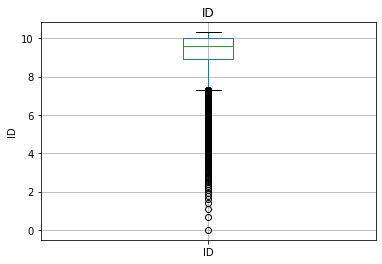

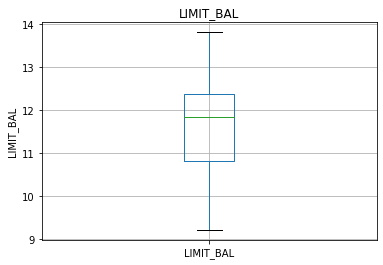

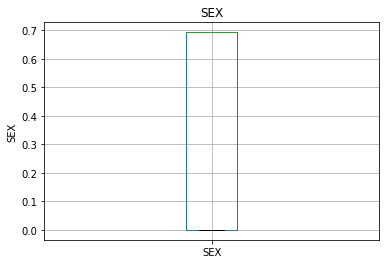

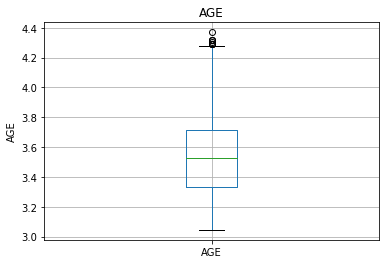

In [8]:
## Outliers 
import numpy as np
for feature in df:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

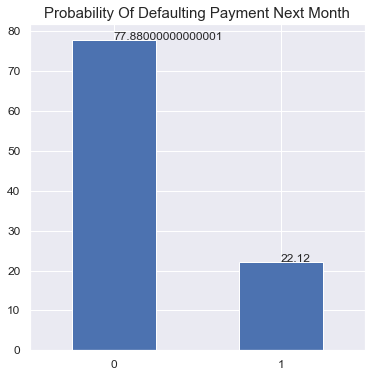

In [135]:
def_cnt = (df.def_pay_month.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

#### We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.

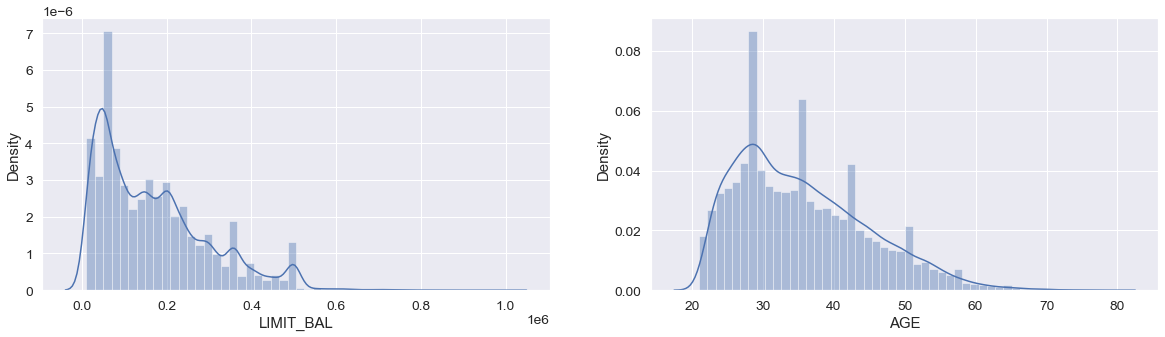

In [136]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

#### observation
By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

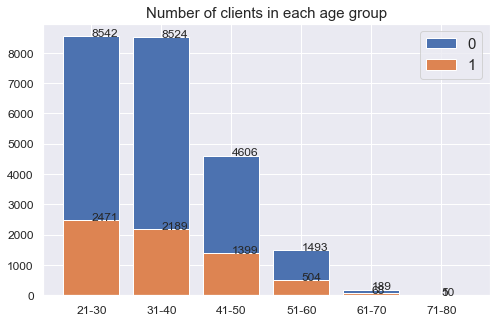

In [137]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['def_pay_month'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['def_pay_month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [12]:
"""We have maximum clients from 21-30 age group followed by 31-40.
Hence with increasing age group the number of clients
that will default the payment next month is decreasing. 
Hence we can see that Age is important feature to predict 
the default payment for next month"""

'We have maximum clients from 21-30 age group followed by 31-40.\nHence with increasing age group the number of clients\nthat will default the payment next month is decreasing. \nHence we can see that Age is important feature to predict \nthe default payment for next month'

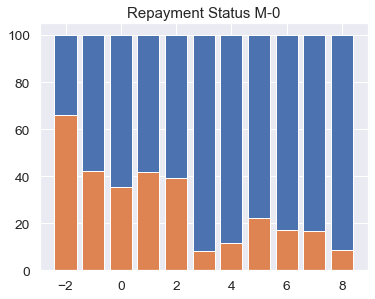

In [138]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_1.unique())
pay_0 = (df.PAY_1[df['def_pay_month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_1[df['def_pay_month'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)
plt.show()

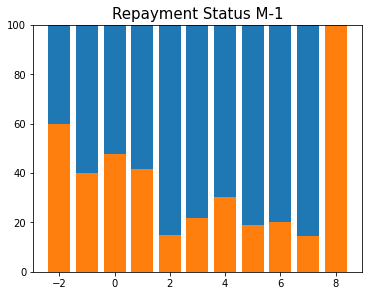

In [17]:
plt.subplots(figsize=(20,10))
ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['def_pay_month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['def_pay_month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)
plt.show()

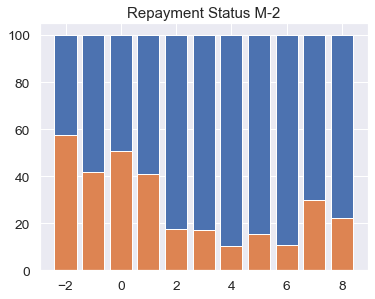

In [139]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['def_pay_month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['def_pay_month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)
plt.show()

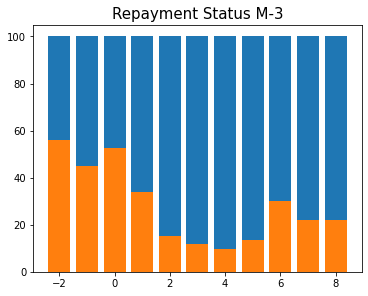

In [26]:
plt.subplots(figsize=(20,10))
ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['def_pay_month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['def_pay_month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)
plt.show()


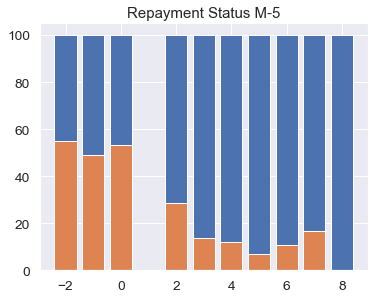

In [140]:
plt.subplots(figsize=(20,10))
ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['def_pay_month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['def_pay_month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)
plt.show()


#### observation
Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

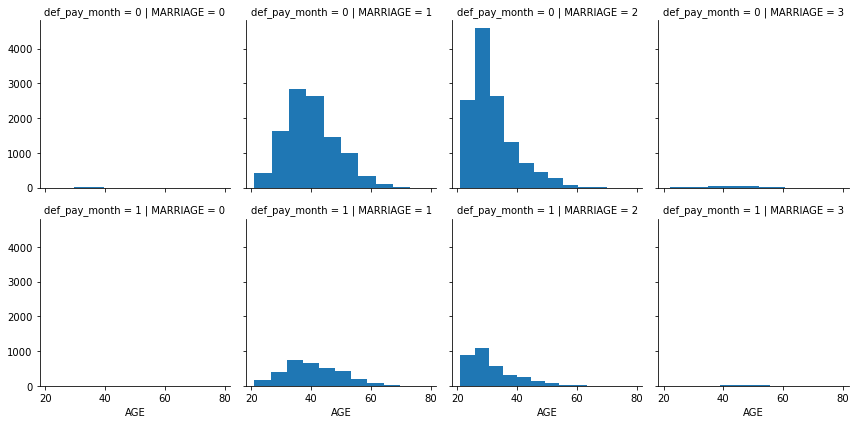

In [33]:
g = sns.FacetGrid(df, row='def_pay_month', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

#### observations
From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

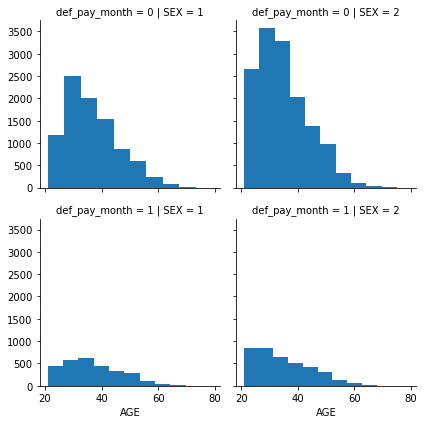

In [34]:
g = sns.FacetGrid(df, row='def_pay_month', col='SEX')
g = g.map(plt.hist, 'AGE')

#### It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

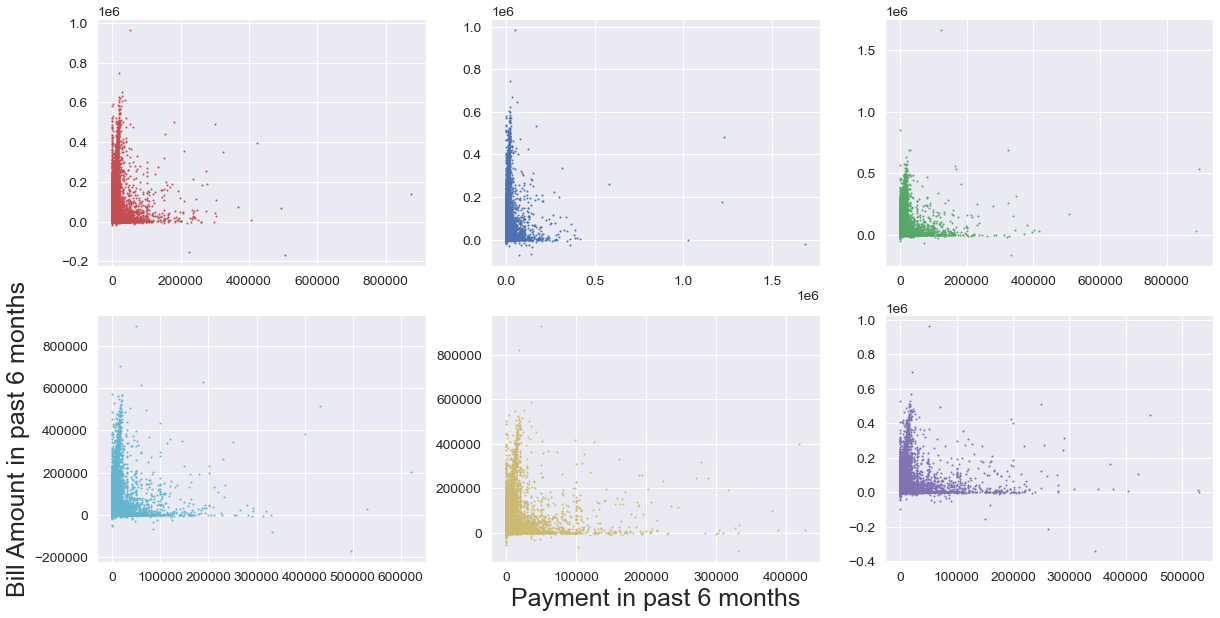

In [141]:
#now we will check if the past six months bill amount will affect the payment 
#default next month or not:

plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()


#### observations
Above plot indicates that there is higher proportion of clients for whom the bill amount 
is high but payment done against the same is very low. This we can infer since maximum number 
of datapoints are closely packed along the Y-axis near to 0 on X-axis

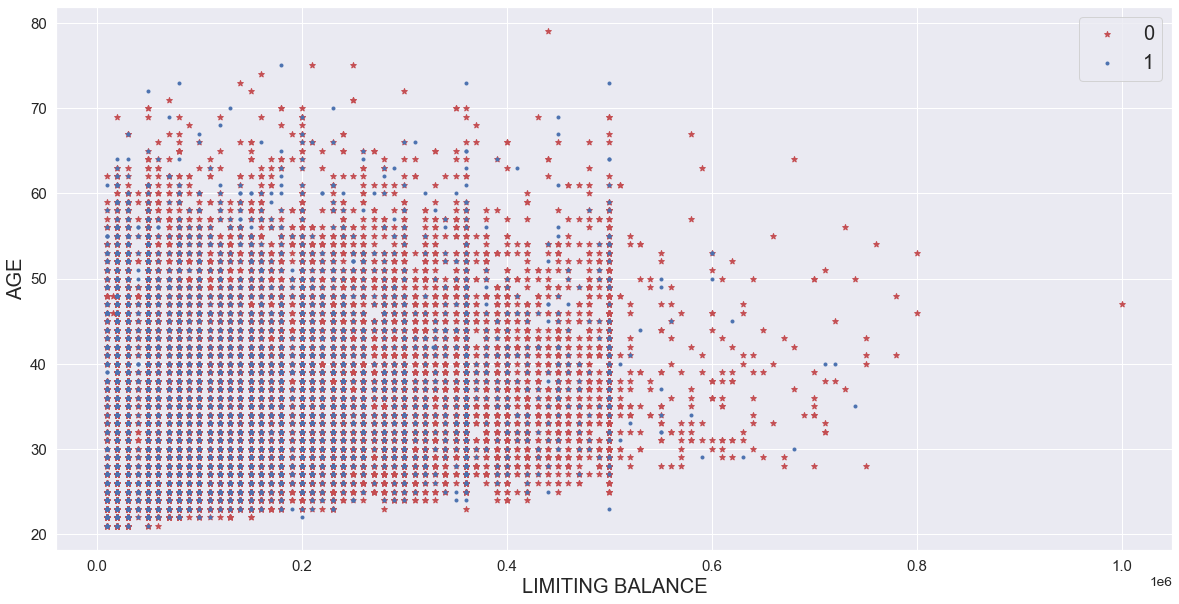

In [142]:
y1 = df.AGE[df["def_pay_month"] == 0]
y2 = df.AGE[df["def_pay_month"] == 1]
x1 = df.LIMIT_BAL[df["def_pay_month"] == 0]
x2 = df.LIMIT_BAL[df["def_pay_month"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()


#### Above plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

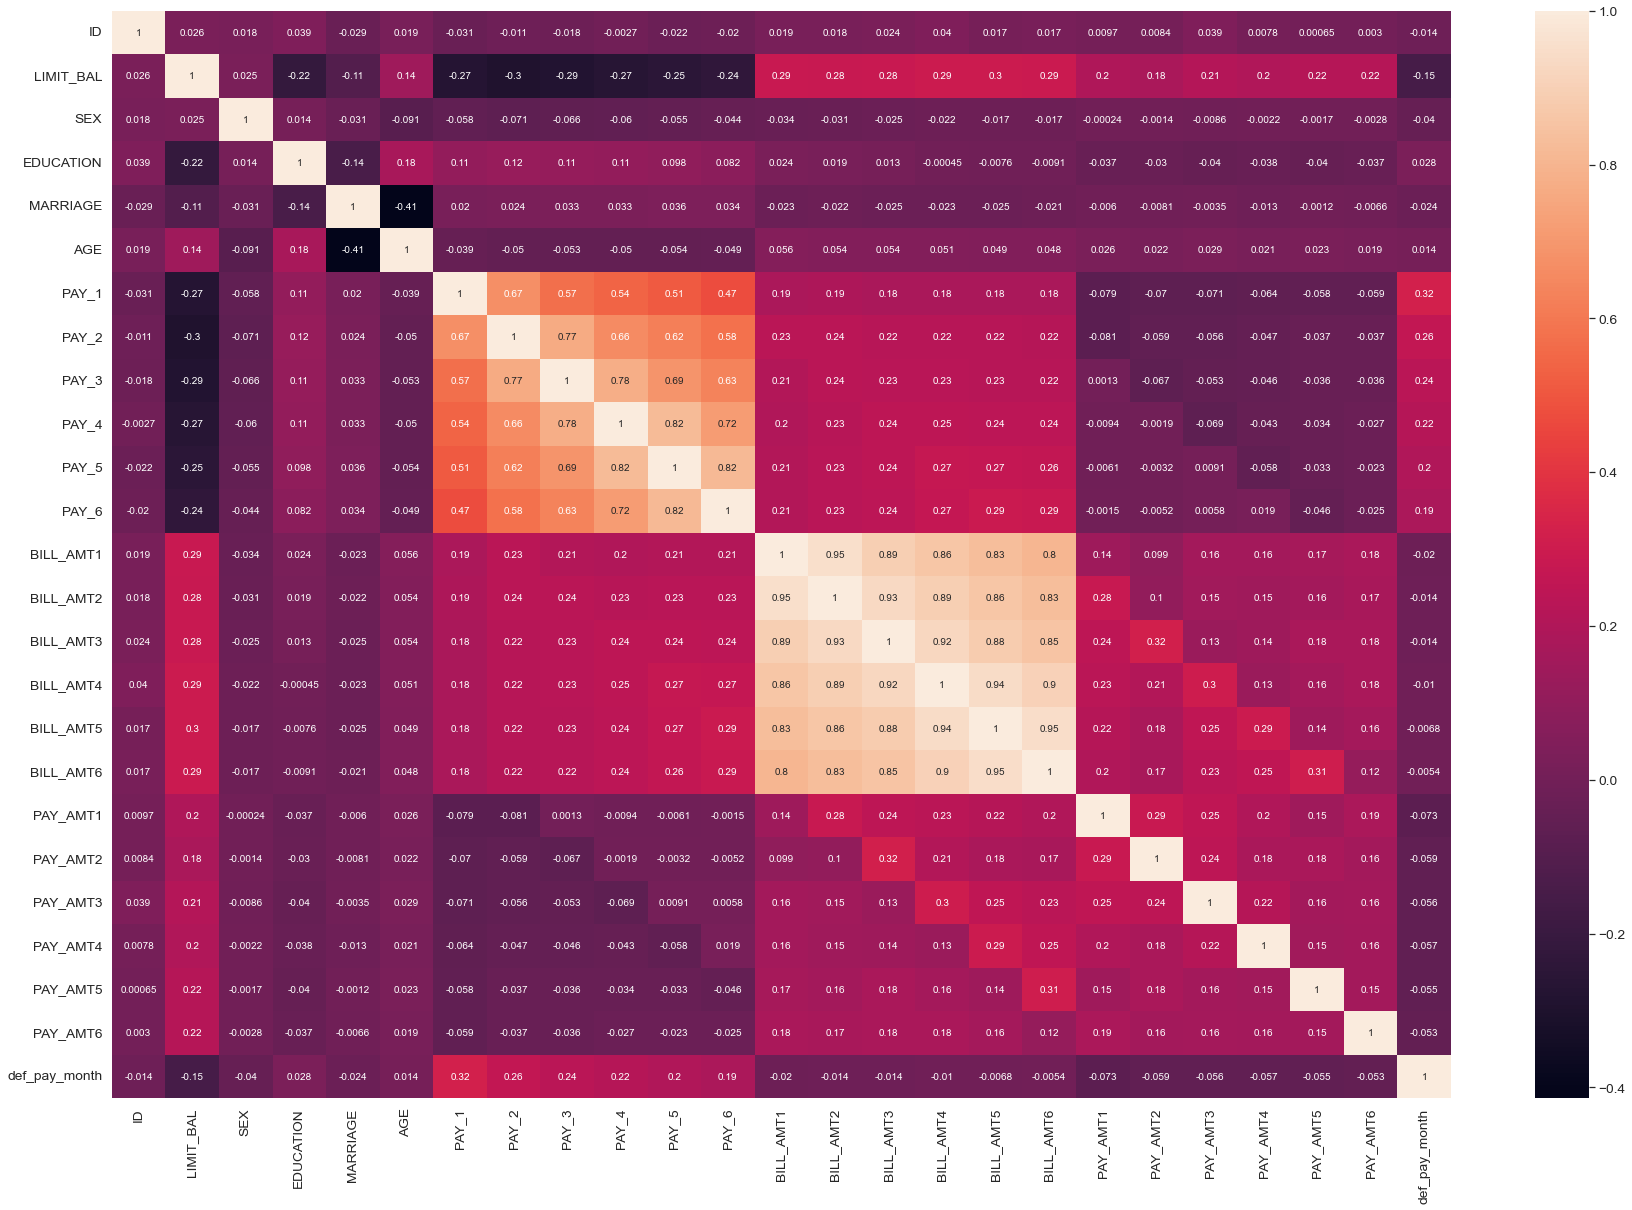

In [143]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

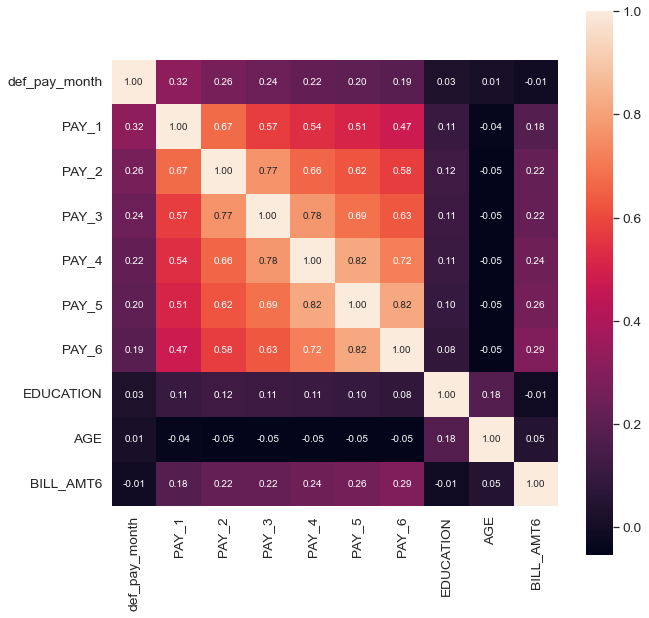

In [145]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'def_pay_month')['def_pay_month'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### observation
as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.

We will first train model wil all the features and try reducing the non-important features.

In [165]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# to plot confusion matrix
def draw_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# calculate different metric scores of the model - Accuracy, Recall, F1 and Precision
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[] 
    
    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    # populate the score_list 
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    return score_list # returning the list with train and test scores
    


In [59]:
#create a list of categorical columns
cat_cols =  df.select_dtypes(["category"])

#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

2    18112
1    11888
Name: SEX, dtype: int64
--------------------------------------------------


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
--------------------------------------------------


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
--------------------------------------------------


0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_1, dtype: int64
--------------------------------------------------


0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64
--------------------------------------------------


0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64
-----------------------------------

In [126]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

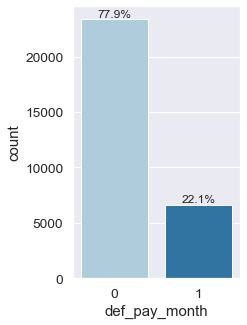

In [62]:
 # use label_barplot function to plot the graph
labeled_barplot(df,'def_pay_month', True, False) 

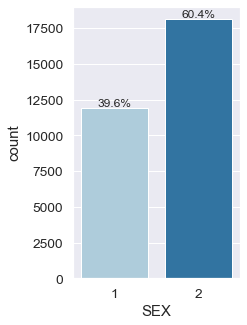

In [63]:
labeled_barplot(df,"SEX",True,False) 

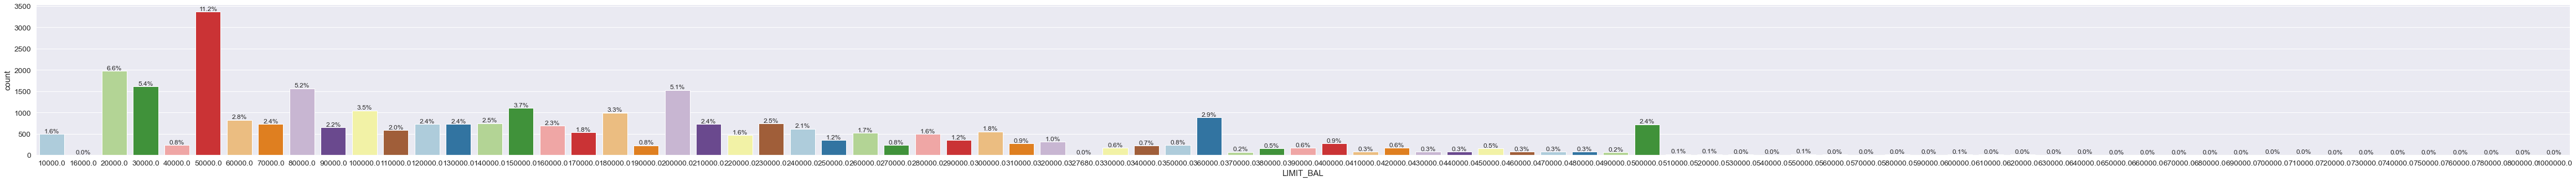

In [66]:
labeled_barplot(df,'LIMIT_BAL',True,False)

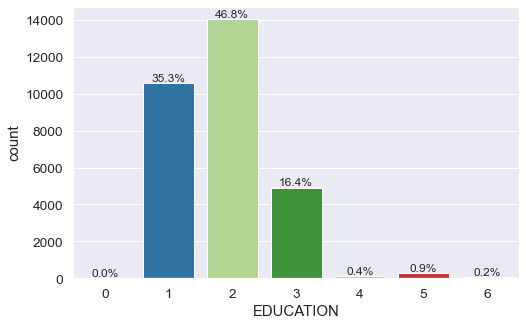

In [67]:
labeled_barplot(df,'EDUCATION',True,False)

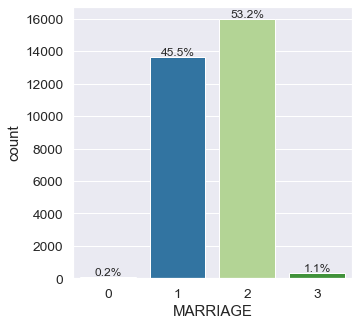

In [68]:
labeled_barplot(df,'MARRIAGE',True,False)

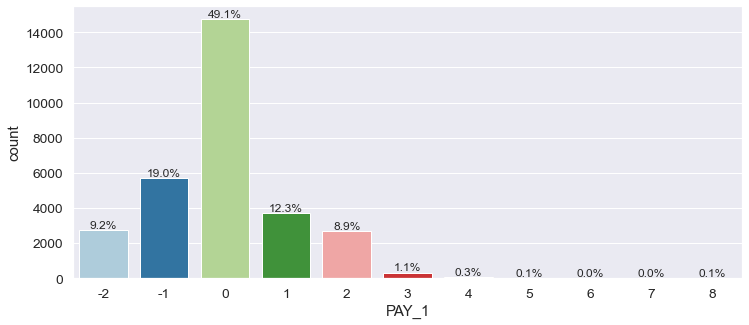

In [73]:
labeled_barplot(df,'PAY_1',True,False)

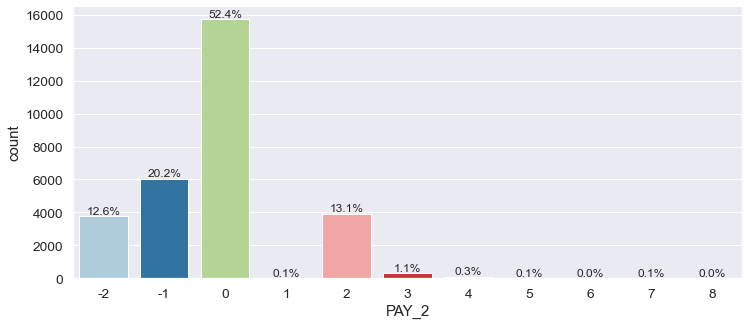

In [74]:
labeled_barplot(df,'PAY_2',True,False)

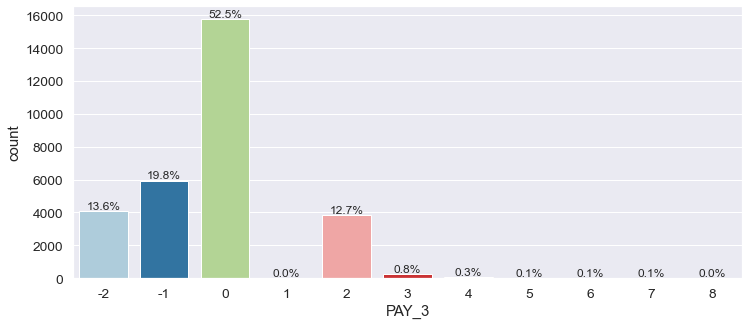

In [75]:
labeled_barplot(df,'PAY_3',True,False)

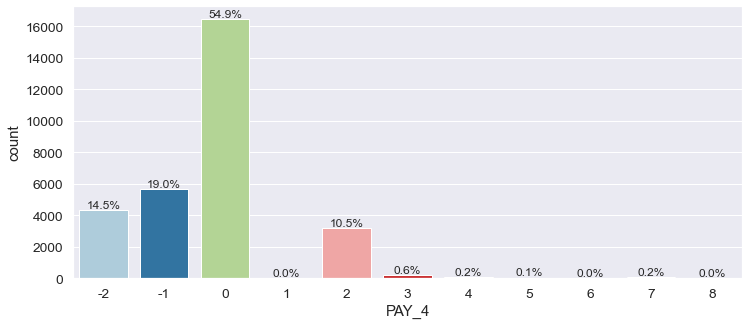

In [76]:
labeled_barplot(df,'PAY_4',True,False)

def_pay_month      0     1    All
SEX                              
All            23364  6636  30000
2              14349  3763  18112
1               9015  2873  11888
------------------------------------------------------------------------------------------------------------------------


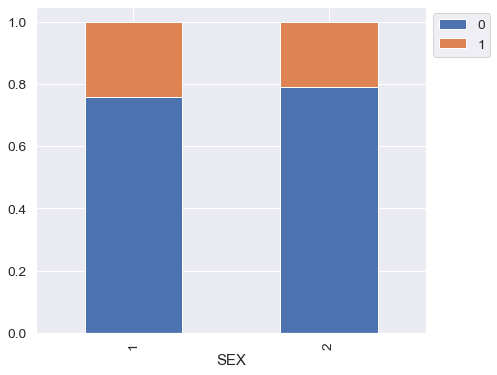

In [79]:
stacked_barplot(df, "SEX", "def_pay_month")

def_pay_month      0     1    All
MARRIAGE                         
All            23364  6636  30000
2              12623  3341  15964
1              10453  3206  13659
3                239    84    323
0                 49     5     54
------------------------------------------------------------------------------------------------------------------------


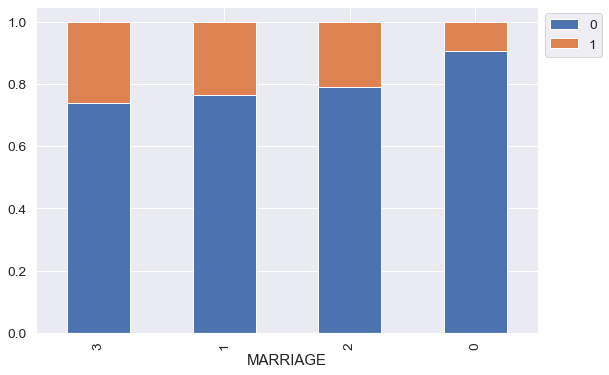

In [80]:
stacked_barplot(df, "MARRIAGE", "def_pay_month")

def_pay_month      0     1    All
EDUCATION                        
All            23364  6636  30000
2              10700  3330  14030
1               8549  2036  10585
3               3680  1237   4917
5                262    18    280
6                 43     8     51
4                116     7    123
0                 14     0     14
------------------------------------------------------------------------------------------------------------------------


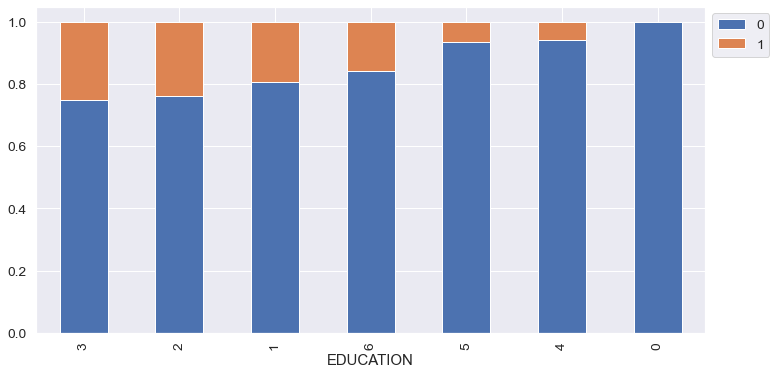

In [81]:
stacked_barplot(df, "EDUCATION", "def_pay_month")

def_pay_month      0     1    All
PAY_1                            
All            23364  6636  30000
0              12849  1888  14737
2                823  1844   2667
1               2436  1252   3688
-1              4732   954   5686
-2              2394   365   2759
3                 78   244    322
4                 24    52     76
5                 13    13     26
8                  8    11     19
7                  2     7      9
6                  5     6     11
------------------------------------------------------------------------------------------------------------------------


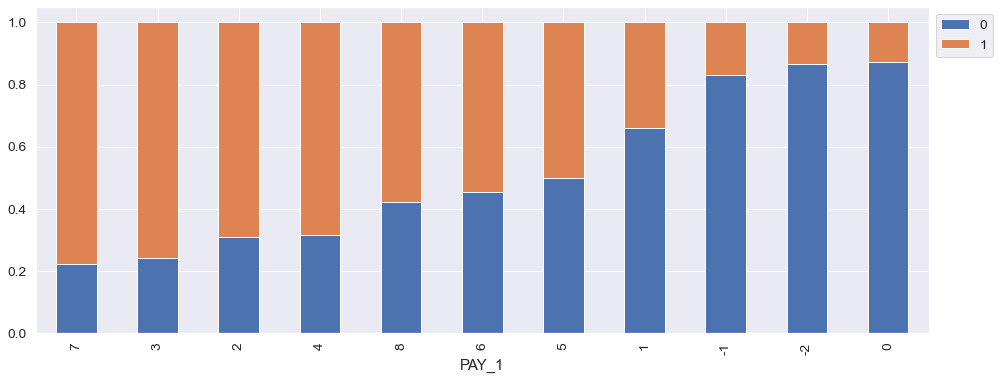

In [82]:
stacked_barplot(df, "PAY_1", "def_pay_month")

def_pay_month      0     1    All
PAY_2                            
All            23364  6636  30000
0              13227  2503  15730
2               1743  2184   3927
-1              5084   966   6050
-2              3091   691   3782
3                125   201    326
4                 49    50     99
5                 10    15     25
7                  8    12     20
6                  3     9     12
1                 23     5     28
8                  1     0      1
------------------------------------------------------------------------------------------------------------------------


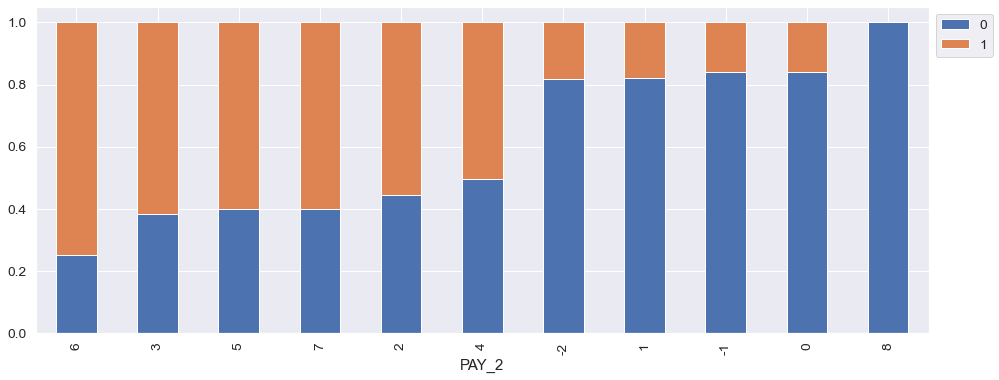

In [83]:
stacked_barplot(df, "PAY_2", "def_pay_month")

def_pay_month      0     1    All
PAY_3                            
All            23364  6636  30000
0              13013  2751  15764
2               1850  1969   3819
-1              5012   926   5938
-2              3328   757   4085
3                102   138    240
4                 32    44     76
7                  5    22     27
6                  9    14     23
5                  9    12     21
8                  1     2      3
1                  3     1      4
------------------------------------------------------------------------------------------------------------------------


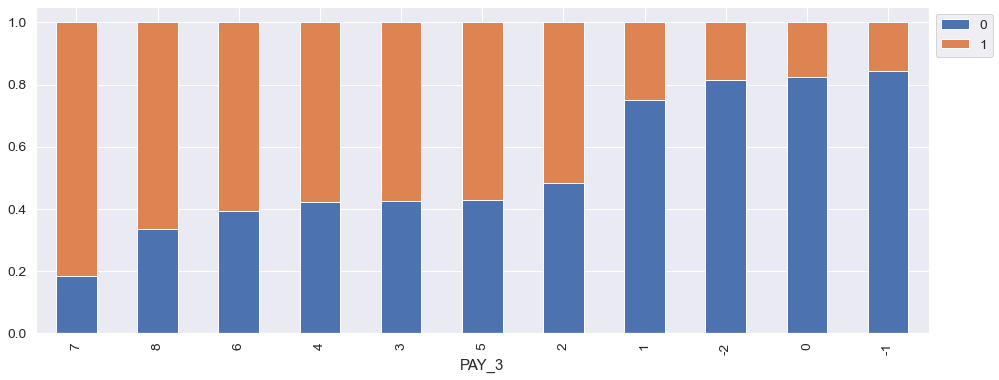

In [84]:
stacked_barplot(df, "PAY_3", "def_pay_month")

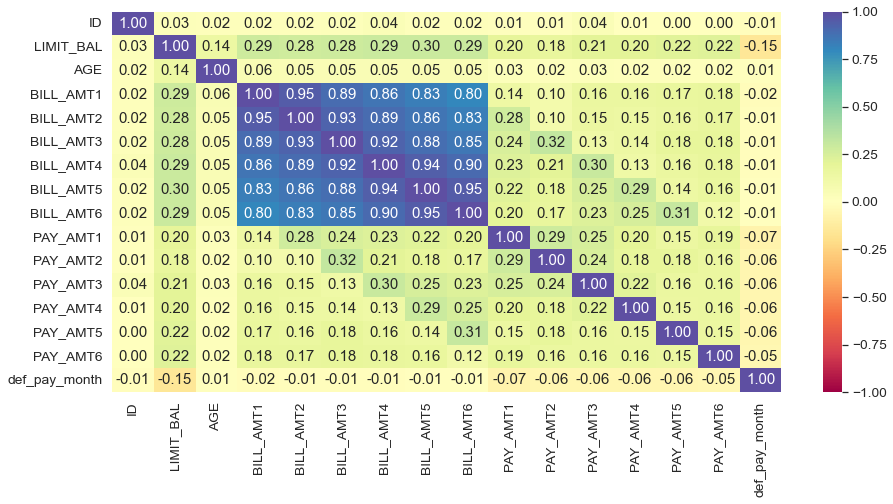

In [88]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

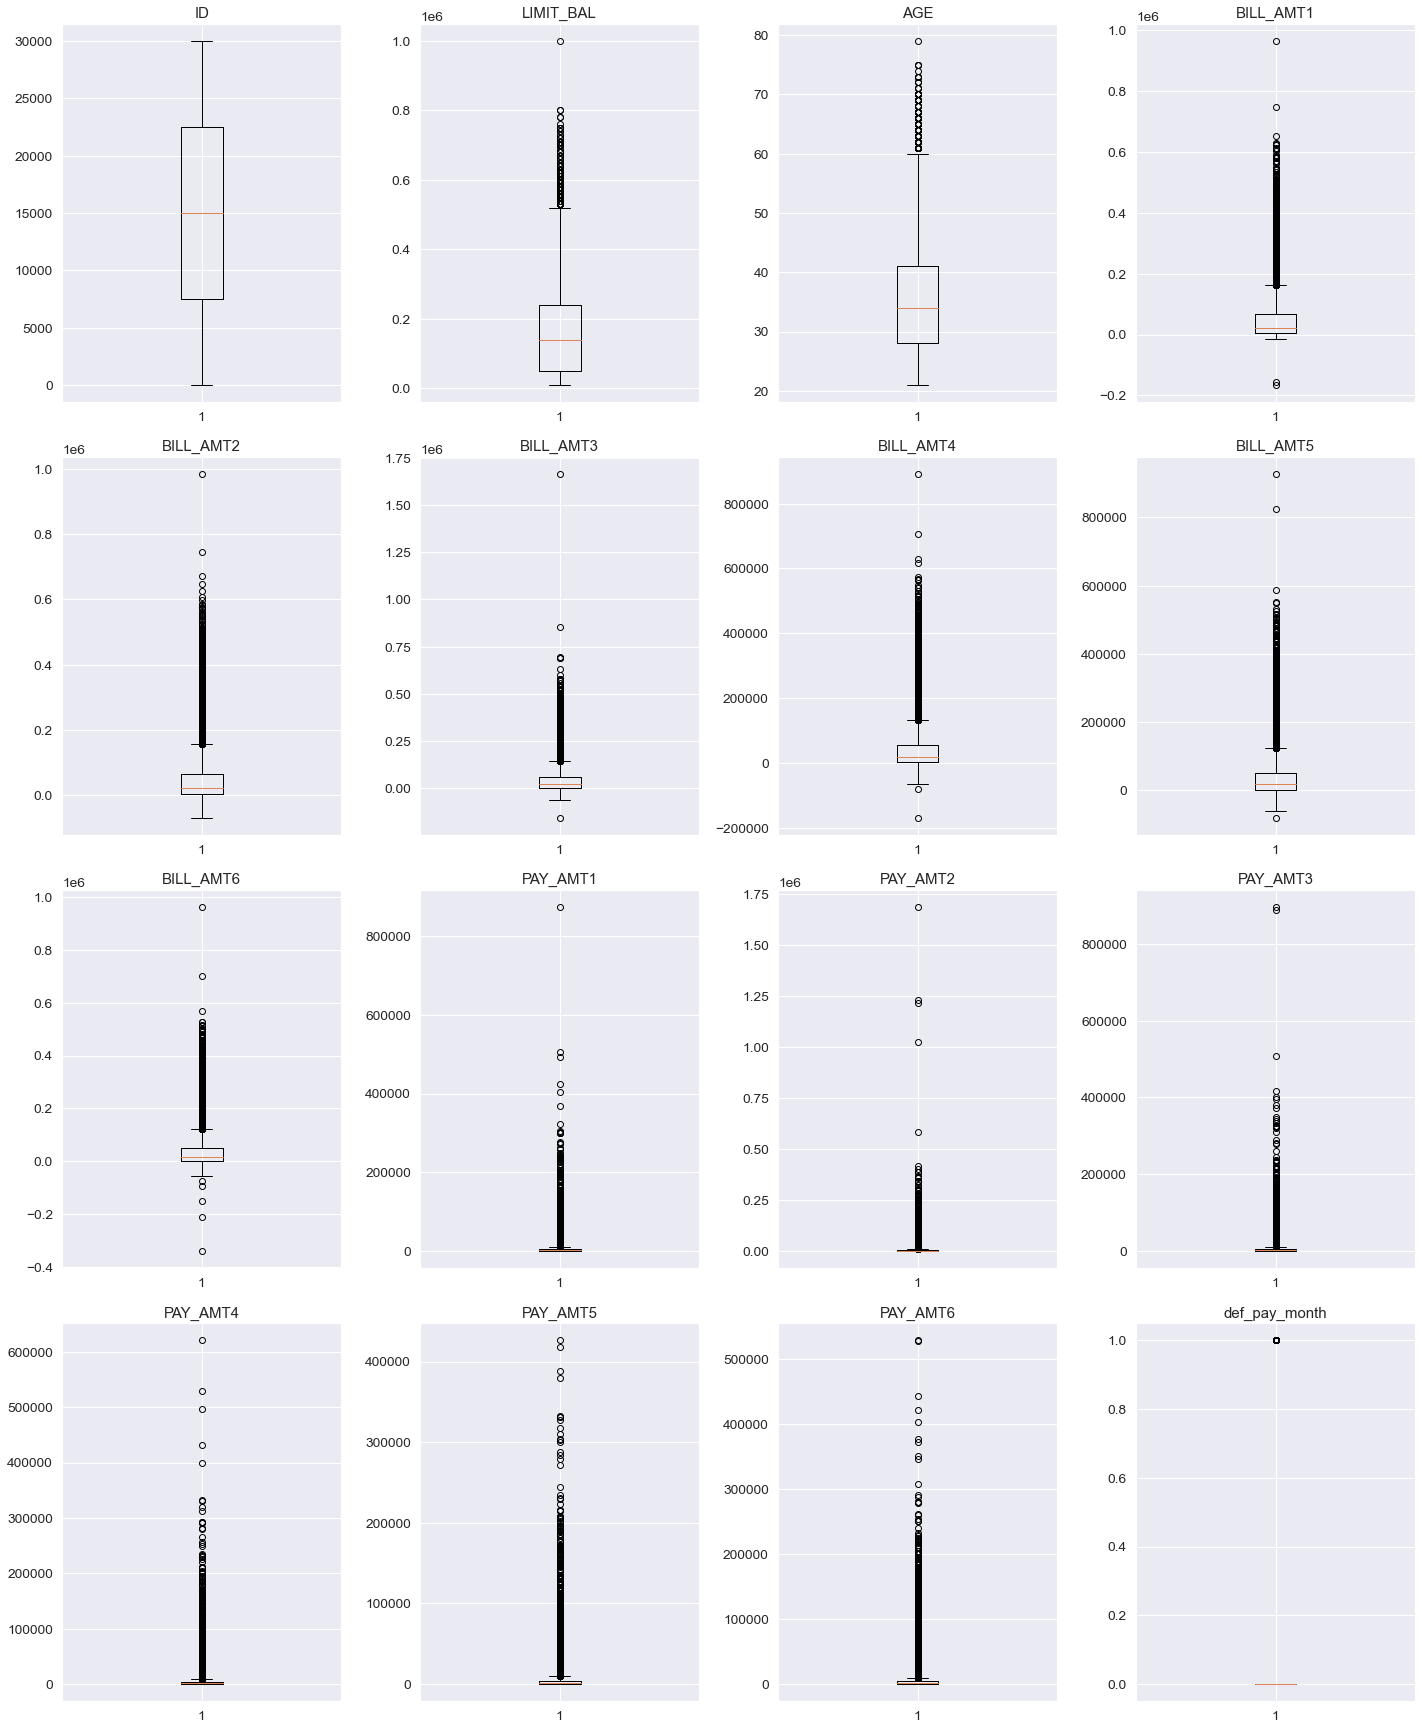

In [89]:
#Outliers Treatment
# check the outliers before treating
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

<AxesSubplot:xlabel='PAY_AMT3', ylabel='PAY_AMT5'>

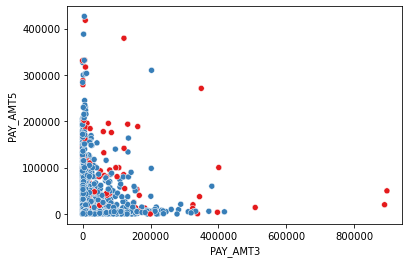

In [13]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import seaborn as sns

clf = IsolationForest(contamination=0.01)
outliers = clf.fit_predict(df)
sns.scatterplot(df.PAY_AMT3, df.PAY_AMT5, outliers, palette='Set1', legend=False)
# plt.savefig('outliers.png', dpi=300)

In [147]:
X = df.drop(['def_pay_month','AGE_BIN'], axis=1)
y = df.def_pay_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [148]:
X = df.drop(['def_pay_month','AGE_BIN'], axis=1)
y = df.def_pay_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [41]:
model1.score(X_train, y_train)

0.778375

In [42]:
model1.score(X_test, y_test)

0.7801666666666667

In [43]:
y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


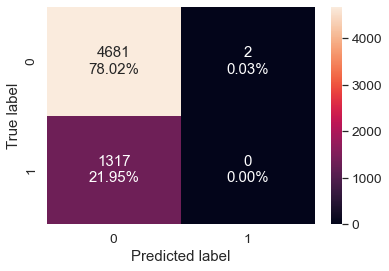

In [158]:
# use draw_matrix function
draw_matrix(model1, X_test, y_test)

#### 
We can see that All the examples are predicted to be negative to default payment next month with 77.7% accuracy whereas in the dataset we have 980 observations that are expected to default payment.
After doing various random sampling by changing the random_date parameter, we found random_state=10 to be giving highest accuracy for our model1

Lets now try changing the datatypes of categorical variables from int to category

In [45]:
# change the datatype of categorical features from integer to category
df.SEX = df.SEX.astype("category")
df.EDUCATION = df.EDUCATION.astype("category")
df.MARRIAGE = df.MARRIAGE.astype("category")
df.PAY_1 = df.PAY_1.astype("category")
df.PAY_2 = df.PAY_2.astype("category")
df.PAY_3 = df.PAY_3.astype("category")
df.PAY_4 = df.PAY_4.astype("category")
df.PAY_5 = df.PAY_5.astype("category")
df.PAY_6 = df.PAY_6.astype("category")
df.def_type = df.def_pay_month.astype("category")

In [151]:
df_X = df.drop(['def_pay_month','AGE_BIN'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)


LogisticRegression()

In [152]:
model1.score(X_train, y_train)

0.778375

In [49]:
model1.score(X_test, y_test)

0.7801666666666667

In [50]:
y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model2:  0.7801666666666667


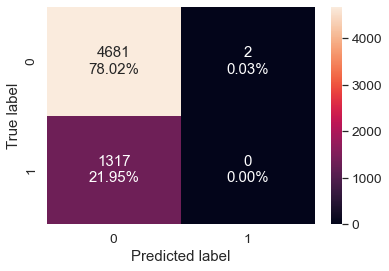

In [159]:
# use draw_matrix function
draw_matrix(model2, X_test, y_test)

# observation
Even after changing the datatype of certain variables there is no change if accuracy of the model.

So we evaluate now by dropping the multicollinearity variables and keeping only PAY_1 variable.

In [52]:
X = df.drop(['def_pay_month','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
y = df.def_pay_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model3:  0.7801666666666667


In [54]:
X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
y = df.def_pay_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.78      0.88      3000

[[2334  666]
 [   0    0]]

Test Accuracy Score for model4:  0.778

Train Accuracy Score for model4:  0.7788888888888889


####
We can see that by removing the unimportant and multicollinear data, the accuracy has marginally increased by more than 2%

In [55]:
X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
y = df.def_pay_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8694
           1       0.11      0.70      0.18       306

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1784]
 [  93  213]]

Test Accuracy Score for model5:  0.7914444444444444

Train Accuracy Score for model5:  0.7915238095238095


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)
# libraries to build xgboost model
from xgboost import XGBClassifier

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

In [154]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

In [155]:
# fit the model on training dataset
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [156]:

y_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model Desicion Tree: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for Descision Tree: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4674
           1       0.38      0.38      0.38      1326

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000

[[3860  814]
 [ 823  503]]

Test Accuracy Score for model Desicion Tree:  0.7271666666666666

Train Accuracy Score for Descision Tree:  1.0


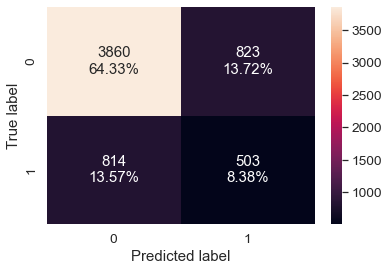

In [157]:
# use draw_matrix function
draw_matrix(dtc, X_test, y_test)

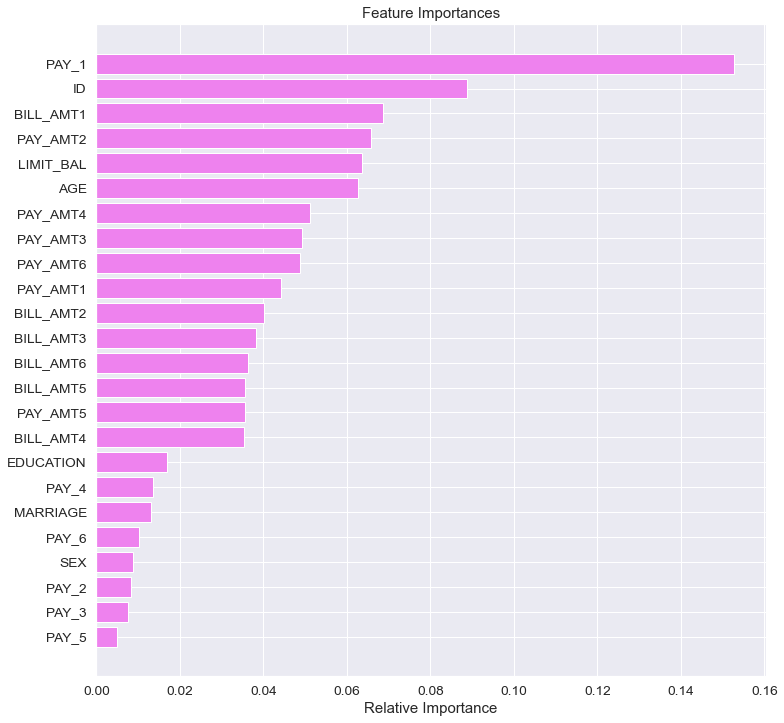

In [163]:
# creating a list of column names
feature_names = X_train.columns.to_list()
feature_names
#Check the important variables
# plot a horizontal bar graph
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [170]:
# baggingClassifier
bgc = BaggingClassifier(random_state=44)

# fit the model on training dataset
bgc.fit(X_train, y_train)

BaggingClassifier(random_state=44)

In [172]:
bgc.score(X_train, y_train)

0.9810416666666667

In [176]:
bgc.score(X_test, y_test)

0.8076666666666666

In [175]:
y_pred = bgc.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for bagging classifier: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5277
           1       0.34      0.61      0.43       723

    accuracy                           0.81      6000
   macro avg       0.64      0.72      0.66      6000
weighted avg       0.87      0.81      0.83      6000

[[4403  874]
 [ 280  443]]

Accuracy Score for bagging classifier:  0.8076666666666666


In [177]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgclr = BaggingClassifier(base_estimator=LogisticRegression(solver="liblinear", random_state=44),random_state=1) 

# fit the model on training set
bgclr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=44,
                                                    solver='liblinear'),
                  random_state=1)

In [178]:
bgclr.score(X_train, y_train)

0.778375

In [179]:
bgclr.score(X_test, y_test)

0.7801666666666667

In [180]:
y_pred = bgclr.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for bagging classifier: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for bagging classifier:  0.7801666666666667


In [181]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgcdt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1),random_state=1)

# fit the model on training set
bgcdt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=1),
                  random_state=1)

In [183]:
bgcdt.score(X_train, y_train)

0.9782916666666667

In [184]:
bgcdt.score(X_test, y_test)

0.81

In [185]:
y_pred = bgcdt.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for bagging classifier with gini: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5367
           1       0.31      0.64      0.42       633

    accuracy                           0.81      6000
   macro avg       0.63      0.73      0.65      6000
weighted avg       0.88      0.81      0.84      6000

[[4455  912]
 [ 228  405]]

Accuracy Score for bagging classifier with gini:  0.81


In [188]:
# set the parameters
parameters = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

# assigning Bootstrap = True to select features with Replacement
bgc1 = BaggingClassifier(random_state=1,bootstrap=True)

# fit the best algorithm to the data.
bgc1.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [189]:
bgc1.score(X_train, y_train)

0.9808333333333333

In [190]:
bgc1.score(X_test, y_test)

0.808

In [191]:
y_pred = bgc1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for bagging classifier with gini: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5279
           1       0.34      0.61      0.43       721

    accuracy                           0.81      6000
   macro avg       0.64      0.72      0.66      6000
weighted avg       0.87      0.81      0.83      6000

[[4405  874]
 [ 278  443]]

Accuracy Score for bagging classifier with gini:  0.808


In [192]:
# random forest classifier
rfc = RandomForestClassifier(random_state=1)

# fit the model on training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [194]:
rfc.score(X_train,y_train)

1.0

In [195]:
rfc.score(X_test,y_test)

0.8216666666666667

In [196]:
y_pred = rfc.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Random forest: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5253
           1       0.38      0.67      0.48       747

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.88      0.82      0.84      6000

[[4433  820]
 [ 250  497]]

Accuracy Score for Random forest:  0.8216666666666667


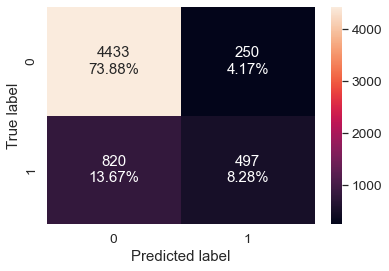

In [197]:
# use draw_matrix function
draw_matrix(rfc, X_test, y_test)

In [207]:
# random forest classifier 
rfcwt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training set
rfcwt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [208]:
rfcwt.score(X_train,y_train)

1.0

In [209]:
rfcwt.score(X_test,y_test)

0.82

In [210]:
y_pred = rfcwt.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Random forest with weight: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5339
           1       0.34      0.68      0.45       661

    accuracy                           0.82      6000
   macro avg       0.65      0.76      0.67      6000
weighted avg       0.89      0.82      0.84      6000

[[4471  868]
 [ 212  449]]

Accuracy Score for Random forest with weight:  0.82


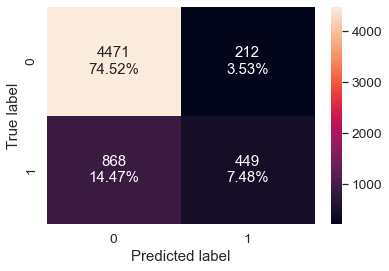

In [211]:
draw_matrix(rfcwt, X_test, y_test)

In [198]:
# adaboost classifier
abc = AdaBoostClassifier(random_state=1)

# fit the model on training set
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [199]:
abc.score(X_train,y_train)

0.815625

In [201]:
abc.score(X_test,y_test)

0.8228333333333333

In [205]:
y_pred = abc.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for adaboost: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      5390
           1       0.33      0.71      0.45       610

    accuracy                           0.82      6000
   macro avg       0.65      0.77      0.67      6000
weighted avg       0.90      0.82      0.85      6000

[[4505  885]
 [ 178  432]]

Accuracy Score for adaboost:  0.8228333333333333


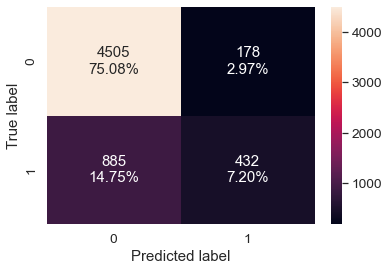

In [203]:
# use draw_matrix function
draw_matrix(abc, X_test, y_test)

In [204]:
# hypertuned adaboost
abc1 = AdaBoostClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    #let"s try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=1),DecisionTreeClassifier(max_depth=2,random_state=1),
                      DecisionTreeClassifier(max_depth=3,random_state=1)],
    "n_estimators": np.arange(10,60,10),
    "learning_rate": [0.05,0.15,0.45,0.75]
}

# fit the best algorithm to the data.
abc1.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
abc1.score(X_train,y_train)

In [ ]:
abc1.score(X_test,y_test)

In [206]:
y_pred = abc1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for adaboost  Hypertuned: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      5390
           1       0.33      0.71      0.45       610

    accuracy                           0.82      6000
   macro avg       0.65      0.77      0.67      6000
weighted avg       0.90      0.82      0.85      6000

[[4505  885]
 [ 178  432]]

Accuracy Score for adaboost  Hypertuned:  0.8228333333333333


In [212]:
# gradient boost classifier
gbc = GradientBoostingClassifier(random_state=1)

# fit the model on training set
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [213]:
gbc.score(X_train,y_train)

0.826125

In [214]:
gbc.score(X_test,y_test)

0.8243333333333334

In [215]:
y_pred = gbc.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Gradient Boosting: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5307
           1       0.36      0.69      0.48       693

    accuracy                           0.82      6000
   macro avg       0.66      0.77      0.69      6000
weighted avg       0.89      0.82      0.85      6000

[[4468  839]
 [ 215  478]]

Accuracy Score for Gradient Boosting:  0.8243333333333334


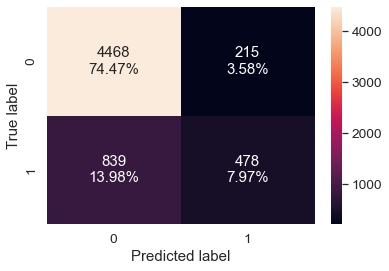

In [216]:
# use draw_matrix function
draw_matrix(gbc, X_test, y_test)

In [217]:
# Choose the type of classifier. 
gbcab1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10),
    "subsample":[0.4],
    "max_features":[0.6],
    "learning_rate": [0.05,0.5]
}
# Fit the best algorithm to the data.
gbcab1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [218]:
gbcab1.score(X_train,y_train)

0.825125

In [219]:
gbcab1.score(X_test,y_test)

0.8256666666666667

In [220]:
y_pred = gbcab1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Hypertuned Gradient Boost Classifier: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.90      5305
           1       0.37      0.69      0.48       695

    accuracy                           0.83      6000
   macro avg       0.66      0.77      0.69      6000
weighted avg       0.89      0.83      0.85      6000

[[4471  834]
 [ 212  483]]

Accuracy Score for Hypertuned Gradient Boost Classifier:  0.8256666666666667


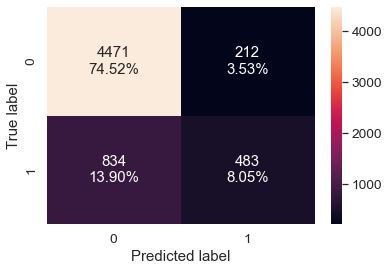

In [222]:
# use draw_matrix function
draw_matrix(gbcab1, X_test, y_test)

In [223]:
# xgbclassifier with eval_metric="logloss"
xgbc = XGBClassifier(random_state=1, eval_metric="logloss")

# fit the model on training set
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [225]:
xgbc.score(X_train,y_train)

0.8842916666666667

In [226]:
xgbc.score(X_test,y_test)

0.8246666666666667

In [227]:
y_pred = xgbc.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for xg boost classifier: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      5259
           1       0.38      0.68      0.49       741

    accuracy                           0.82      6000
   macro avg       0.67      0.76      0.69      6000
weighted avg       0.88      0.82      0.84      6000

[[4445  814]
 [ 238  503]]

Accuracy Score for xg boost classifier:  0.8246666666666667


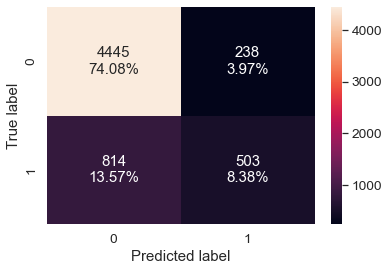

In [228]:
# use draw_matrix function
draw_matrix(xgbc, X_test, y_test)

In [231]:
#Stacking Classifier
# define the estimators for the model
estimators = [("Random Forest",rfc),("ADA Boosting",abc),("Decision Tree",dtc)]


# choose the classifier
sc= StackingClassifier(estimators=estimators)

# train the model on training set
sc.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('ADA Boosting',
                                AdaBoostClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       random_state=1))])

In [232]:
sc.score(X_train,y_train)

0.9999583333333333

In [233]:
sc.score(X_test,y_test)

0.822

In [234]:
y_pred = sc.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for stacking classifier: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5309
           1       0.36      0.68      0.47       691

    accuracy                           0.82      6000
   macro avg       0.65      0.76      0.68      6000
weighted avg       0.88      0.82      0.84      6000

[[4462  847]
 [ 221  470]]

Accuracy Score for stacking classifier:  0.822


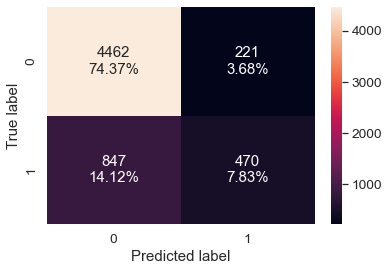

In [235]:
# use draw_matrix function
draw_matrix(sc, X_test, y_test)